<a href="https://colab.research.google.com/github/rNEGI1729/Drug-Recommendation-System/blob/main/Drug_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Making dataframe for preprocessing

In [2]:
df1 = pd.read_csv('train.tsv', sep='\t')
df2 = pd.read_csv('test.tsv', sep='\t')

df = pd.concat([df1,df2],ignore_index=False)
df.reset_index(drop=True, inplace=True)


In [3]:
df.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215063 entries, 0 to 215062
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   215063 non-null  int64  
 1   drugName     215063 non-null  object 
 2   condition    213869 non-null  object 
 3   review       215063 non-null  object 
 4   rating       215063 non-null  float64
 5   date         215063 non-null  object 
 6   usefulCount  215063 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 11.5+ MB


In [5]:
df.isnull().sum()

,0
Unnamed: 0,0
drugName,0
condition,1194
review,0
rating,0
date,0
usefulCount,0


In [6]:
df.dropna(inplace=True)

In [7]:
df.isnull().sum()

,0
Unnamed: 0,0
drugName,0
condition,0
review,0
rating,0
date,0
usefulCount,0


In [8]:
df.duplicated().sum()

0

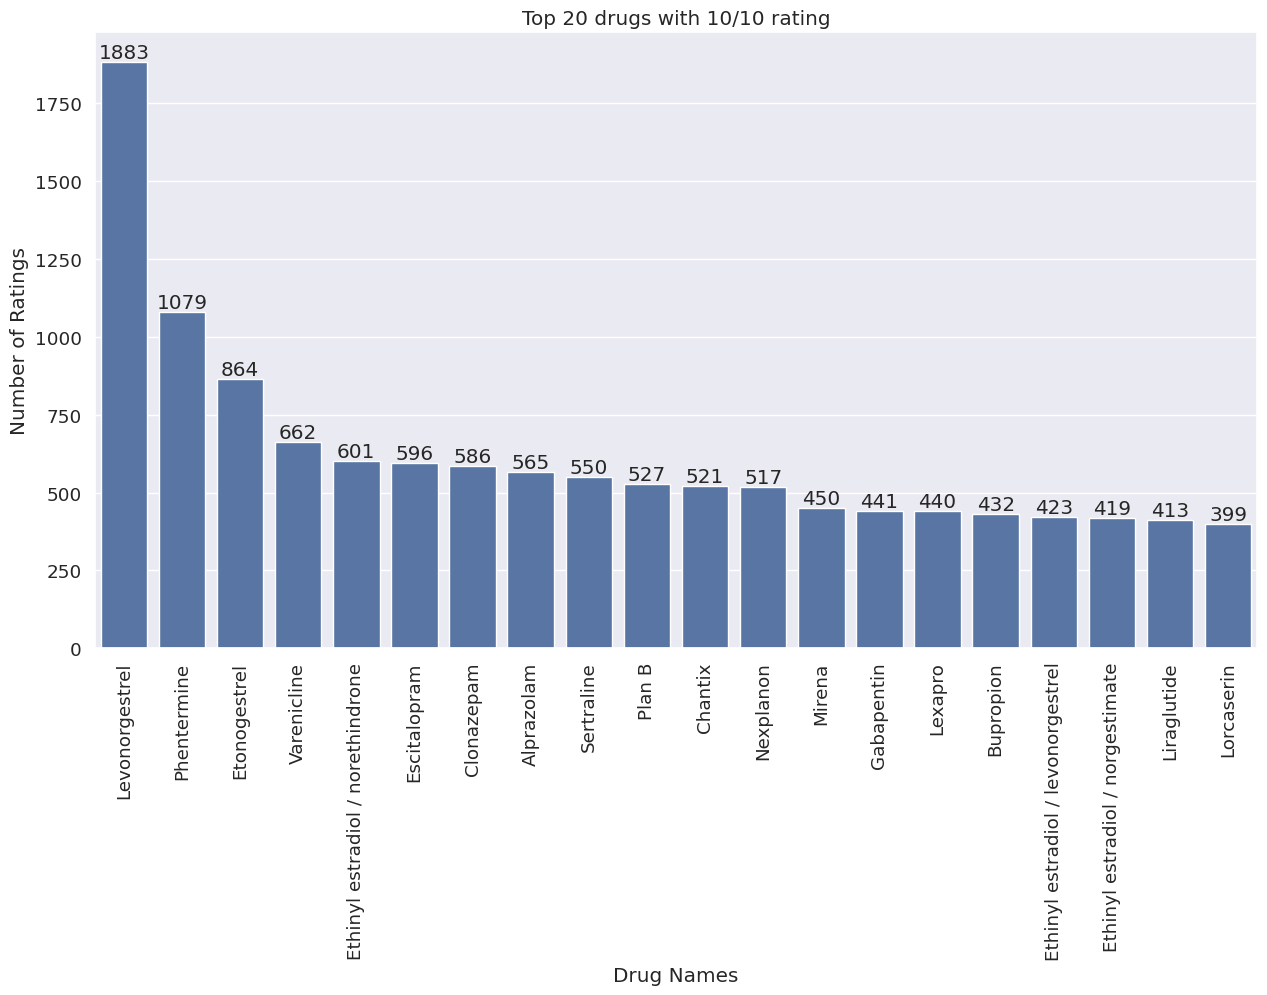

In [9]:
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(df.loc[df.rating == 10, "drugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20])

for i in sns_rating.containers:
    sns_rating.bar_label(i,)

sns_rating.set_title('Top 20 drugs with 10/10 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90)
plt.show()

<ipython-input-10-68734b1ec9ef>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20], palette = 'winter')


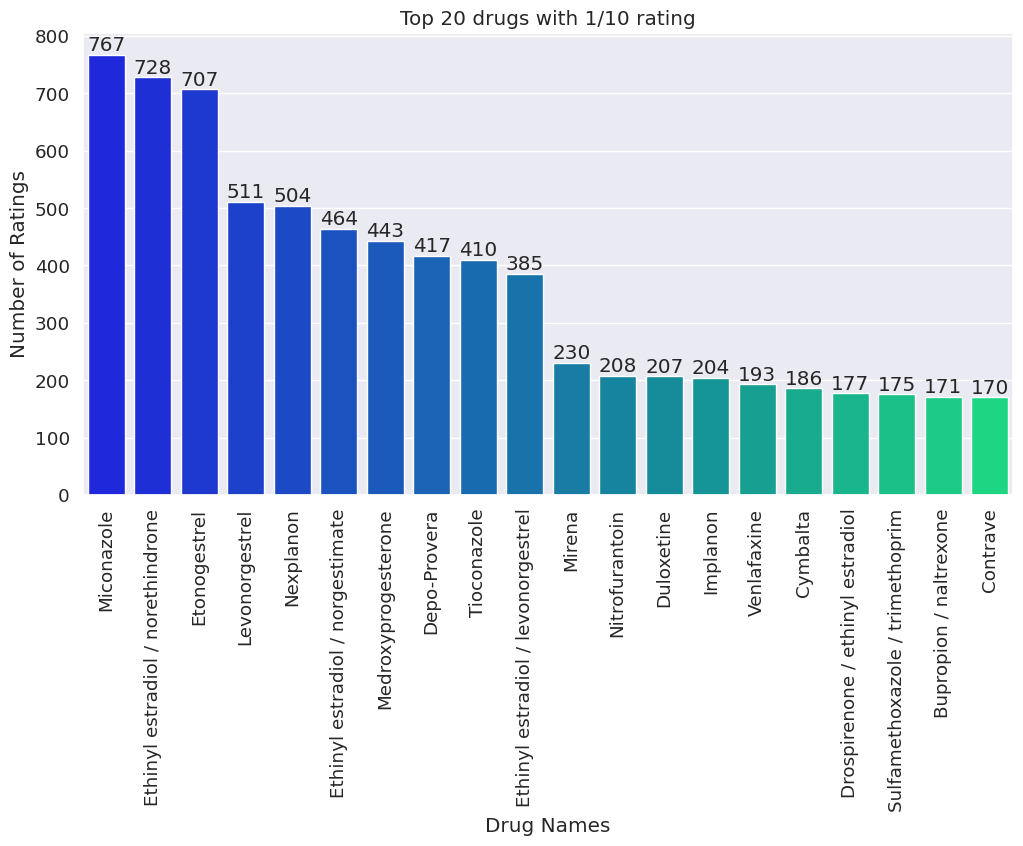

In [10]:
# Setting the Parameter
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [12, 6]

rating = dict(df.loc[df.rating == 1, "drugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20], palette = 'winter')

for i in sns_rating.containers:
    sns_rating.bar_label(i,)

sns_rating.set_title('Top 20 drugs with 1/10 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90)
plt.show()

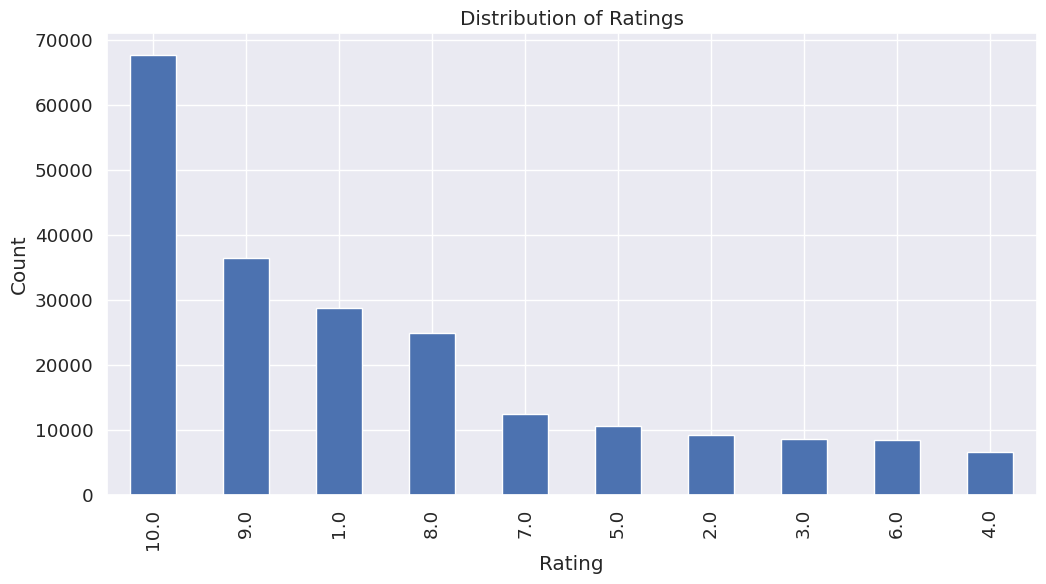

In [11]:
df['rating'].value_counts().plot(kind='bar')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

Text(0, 0.5, 'Count')

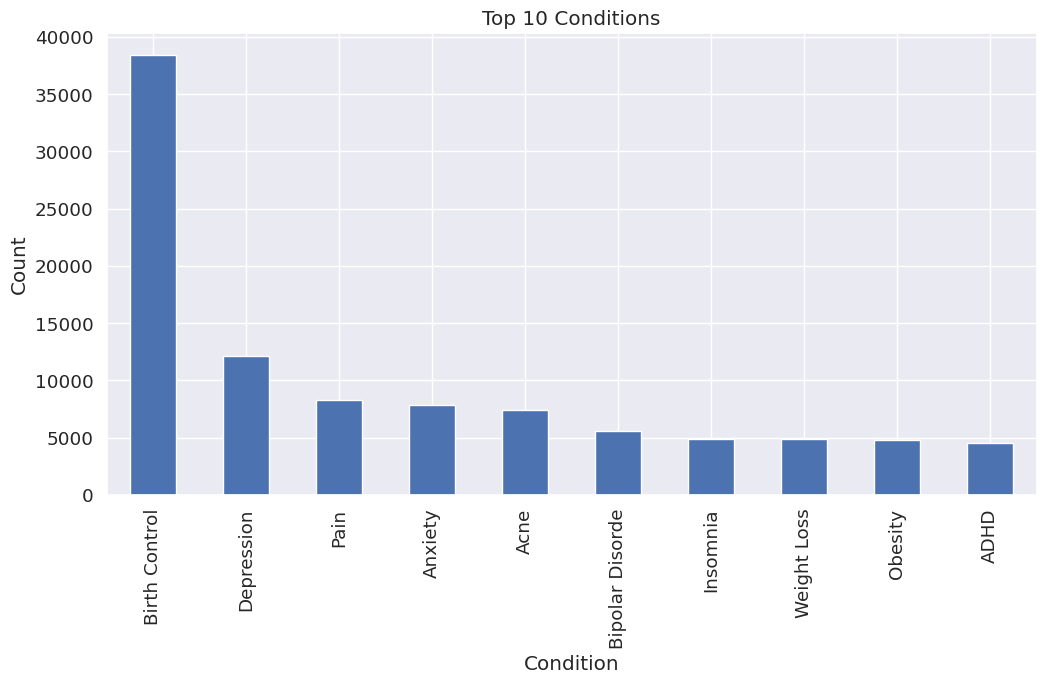

In [12]:
df['condition'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Conditions')
plt.xlabel('Condition')
plt.ylabel('Count')

In [13]:
# drop unwanted columns

df.drop(["Unnamed: 0"],axis=1,inplace=True)


In [14]:
df.head()

,drugName,condition,review,rating,date,usefulCount
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


## Preprocessing (lowering, removing html tags, removing puntuations and stopwords)

In [15]:


import re
# Normalize drug names: Replace slashes with an underscore or keep it as is
def clean_drug_name(drug_name):
    # Convert to lowercase, remove unwanted characters except alphanumeric and slashes
    drug_name = re.sub(r'[^a-zA-Z0-9\s/]', '', drug_name.lower())  # Remove unwanted punctuation/symbols
    drug_name = re.sub(r'\s*/\s*', '/', drug_name) # remove space
    return drug_name.strip()  # Remove leading/trailing spaces

# Apply the normalization function
df['drugName'] = df['drugName'].apply(clean_drug_name)

def clean_condition_name(condition_name):
    # Convert to lowercase, remove unwanted characters except alphanumeric and slashes
    condition_name = re.sub(r'[^a-zA-Z0-9\s/]', '', condition_name.lower())  # Remove unwanted punctuation/symbols
    #condition_name = condition_name.replace(" ", "")
    return condition_name.strip()  # Remove leading/trailing spaces

# Apply the normalization function
df['condition'] = df['condition'].apply(clean_condition_name)

# For spelling errors we can use TextBlob library
from textblob import TextBlob

#def correct_spelling(review):
#    return TextBlob(review).correct().string

import html
def preprocess_review(review):
    # Convert to lowercase
    review = review.lower()

    # Remove non-alphanumeric characters (you can keep spaces and apostrophes)
    review = re.sub(r'[^a-zA-Z0-9\s\']', '', review)

    # Remove stopwords (commonly used words like 'and', 'is', etc.)
    #stop_words = set(stopwords.words('english'))
    #tokens = [word for word in tokens if word not in stop_words]

    return review.strip()
#df['review'] = df['review'].apply(correct_spelling)
df['review'] = df['review'].apply(preprocess_review)



## Extracting year, month and date as they can be features for modelling

In [16]:
# converting the date into datetime format
df['date'] = pd.to_datetime(df['date'], errors = 'coerce')

# extracting year from date
df['Year'] = df['date'].dt.year

# extracting the month from the date
df['month'] = df['date'].dt.month

# extracting the days from the date
df['day'] = df['date'].dt.day

df.drop('date', axis = 1, inplace = True)

## Sentimental analysis(could be done using NLP but rating is given so I'm just levereging that)

In [17]:
# feature engineering
# let's make a new column named "review sentiment"
# Assign sentiments based on rating ranges
df['Review_Sentiment'] = df['rating'].apply(lambda x: 1 if x >= 7 else (-1 if x <= 3 else 0))     # 1 -  positive
                                                                                                  # 0 -  neutral
                                                                                                  #-1 - negative

In [18]:
df['Review_Sentiment'].value_counts()

,count
Review_Sentiment,
1,141560
-1,46634
0,25675


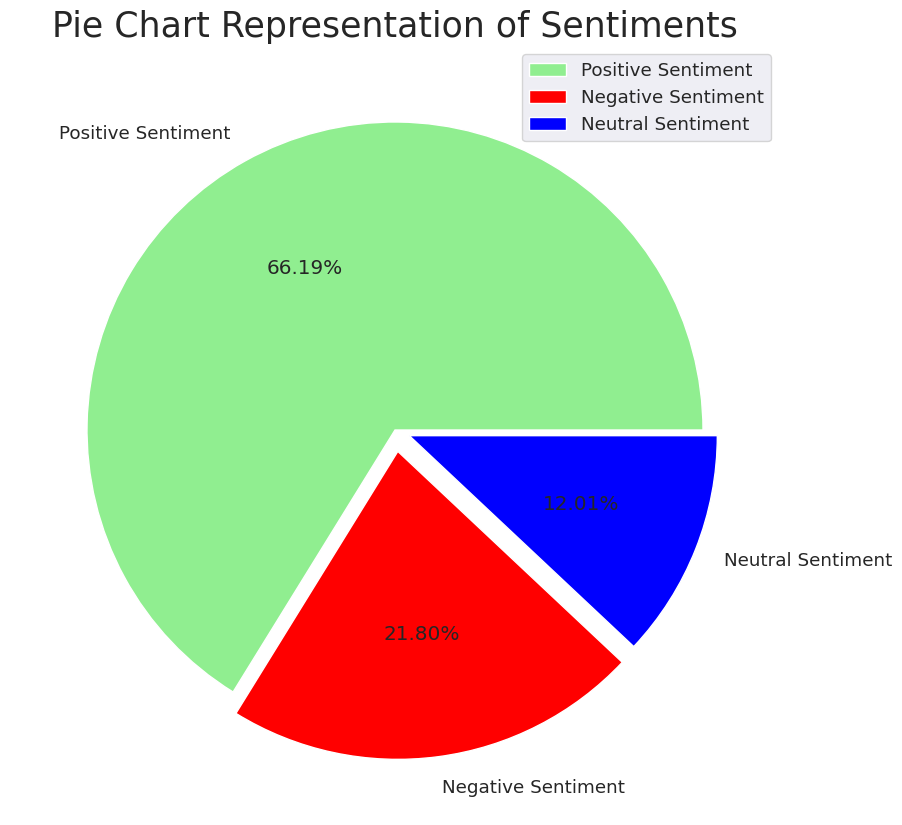

In [19]:
size = [141560, 46634, 25675]
colors = ['lightgreen', 'red','blue']
labels = "Positive Sentiment","Negative Sentiment","Neutral Sentiment"
explode = [0, 0.07,0.05]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, explode = explode, autopct = '%.2f%%')
plt.axis('off')
plt.title('Pie Chart Representation of Sentiments', fontsize = 25)
plt.legend()
plt.show()

In [20]:
df.head()

,drugName,condition,review,rating,usefulCount,Year,month,day,Review_Sentiment
0,valsartan,left ventricular dysfunction,it has no side effect i take it in combination...,9.0,27,2012,5,20,1
1,guanfacine,adhd,my son is halfway through his fourth week of i...,8.0,192,2010,4,27,1
2,lybrel,birth control,i used to take another oral contraceptive whic...,5.0,17,2009,12,14,0
3,ortho evra,birth control,this is my first time using any form of birth ...,8.0,10,2015,11,3,1
4,buprenorphine/naloxone,opiate dependence,suboxone has completely turned my life around ...,9.0,37,2016,11,27,1


## Loading pretrained model for embedding(vectorization of text)

In [21]:


from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

# Load a pre-trained Sentence-BERT model
model = SentenceTransformer('all-MiniLM-L6-v2')

model.save('/content/all-MiniLM-L6-v2-model')



/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

## loading embedded columns which was done earlier(embedding takes time)

In [22]:
# Load embeddings
drug_embeddings = np.load('drug_embeddings.npy')
condition_embeddings = np.load('condition_embeddings.npy')

print("Drug and condition embeddings loaded successfully!")

Drug and condition embeddings loaded successfully!


## User Input

In [23]:
user_input = "I want birth control pills"

## Input text embedding also mapping it with Condition

In [24]:
# Compute embedding for the user's symptom input
user_embedding = model.encode(user_input)


# Calculate cosine similarity
similarity_scores = cosine_similarity([user_embedding], condition_embeddings)

# Get top recommendations
top_indices = similarity_scores[0].argsort()[-1:][::-1]  # Top 3 drugs
input_condition = df.iloc[top_indices]['condition'].tolist()

input_condition = input_condition[0]


print("Recommended condition:", input_condition)

Recommended condition: birth control


## Collaborative Filtering (User-drug interaction)  

In [25]:
# Collaborative Filtering


from sklearn.model_selection import train_test_split

# Identify rare conditions (appearing once or twice)
condition_counts = df['condition'].value_counts()
rare_conditions = condition_counts[condition_counts <= 2].index

# Separate the rare conditions from the main data
rare_df = df[df['condition'].isin(rare_conditions)]
remaining_df = df[~df['condition'].isin(rare_conditions)]

train_remaining_df, test_remaining_df = train_test_split(remaining_df, test_size=0.2, random_state=42)

# Combine the rare conditions with the train and test sets
train_df = pd.concat([train_remaining_df, rare_df], ignore_index=True)
test_df = test_remaining_df


# Assuming df contains condition-drug interactions (condition, drug_name, rating, or useful count)
condition_drug_matrix_train = train_df.pivot_table(index='condition', columns='drugName', values='rating', aggfunc='mean').fillna(0)


from sklearn.metrics.pairwise import cosine_similarity

# Compute cosine similarity between conditions
condition_similarity_train = cosine_similarity(condition_drug_matrix_train)

# Convert similarity matrix into a DataFrame for easier interpretation
condition_similarity_train_df = pd.DataFrame(condition_similarity_train, index=condition_drug_matrix_train.index, columns=condition_drug_matrix_train.index)




def get_collaborative_recommendations_by_condition(input_condition, condition_drug_matrix_train, condition_similarity_train_df, top_n=5):
    # Get the most similar conditions to the target condition
    similar_conditions = condition_similarity_train_df[input_condition].sort_values(ascending=False)[1:].head(top_n).index

    # Get the drugs that are used in these similar conditions
    similar_conditions_drugs = condition_drug_matrix_train.loc[similar_conditions]

    # Calculate the average rating for these drugs
    drug_scores = similar_conditions_drugs.mean(axis=0)

    # Sort drugs by average rating and return the top N recommendations
    top_drugs = drug_scores.sort_values(ascending=False).head(top_n).index.tolist()

    return top_drugs


# Example usage: Get top 5 drugs for the "head pain" condition

top_recommendations = get_collaborative_recommendations_by_condition(input_condition, condition_drug_matrix_train, condition_similarity_train_df, top_n=5)
print(f"Top 5 collaborative recommendations for condition '{input_condition}': {top_recommendations}")


Top 5 collaborative recommendations for condition 'birth control': ['levora', 'loestrin 24 fe', 'apri', 'necon 1/35', 'microgestin fe 15/30']


## Evaluation Metrics for collaborative filtering

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


#  Get the Collaborative Filtering Recommendations for the Test Set
def get_top_n_recommendations_for_condition(input_condition, condition_drug_matrix_train, condition_similarity_train_df, top_n=5):
    # Get the most similar conditions to the target condition
    similar_conditions = condition_similarity_train_df[input_condition].sort_values(ascending=False)[1:].head(top_n).index
    # Get the drugs used in these similar conditions
    similar_conditions_drugs = condition_drug_matrix_train.loc[similar_conditions]
    # Calculate the average rating for these drugs
    drug_scores = similar_conditions_drugs.mean(axis=0)
    # Sort drugs by average rating and return the top N recommendations
    return drug_scores.sort_values(ascending=False).head(top_n).index.tolist()


# 3. Calculate Precision, Recall, and RMSE
def calculate_metrics(test_df, condition_drug_matrix_train, condition_similarity_train_df, top_n=5):
    precision_at_k = []
    recall_at_k = []
    actual_ratings = []
    predicted_ratings = []

    # Loop through each row in the test data
    for idx, row in test_df.iterrows():
        condition = row['condition']
        true_drug = row['drugName']
        true_rating = row['rating']  # or 'useful_count' if that's your rating equivalent

        # Get the top N recommended drugs
        recommended_drugs = get_top_n_recommendations_for_condition(condition, condition_drug_matrix_train, condition_similarity_train_df, top_n)

        # Check if the true drug is in the top N recommendations
        precision_at_k.append(1 if true_drug in recommended_drugs else 0)
        recall_at_k.append(1 if true_drug in recommended_drugs else 0)

        # Compare predicted rating (mean of similar conditions) to true rating
        predicted_rating = np.mean([condition_drug_matrix_train.loc[condition, drug] for drug in recommended_drugs if drug in condition_drug_matrix_train.columns])
        actual_ratings.append(true_rating)
        predicted_ratings.append(predicted_rating)

    # Precision and Recall @ K (average)
    precision_at_k_avg = np.mean(precision_at_k)
    recall_at_k_avg = np.mean(recall_at_k)

    # RMSE
    rmse = np.sqrt(mean_squared_error(actual_ratings, predicted_ratings))

    return precision_at_k_avg, recall_at_k_avg, rmse

# Example usage
precision_at_k, recall_at_k, rmse = calculate_metrics(test_df, condition_drug_matrix_train, condition_similarity_train_df, top_n=5)

print(f"Precision@5: {precision_at_k:.4f}")
print(f"Recall@5: {recall_at_k:.4f}")
print(f"RMSE: {rmse:.4f}")


Precision@5: 0.1510
Recall@5: 0.1510
RMSE: 3.9888


## Content based filtering

In [27]:
def get_content_based_recommendations(user_input, model, drug_embeddings, df, top_n):
  user_embedding = model.encode(user_input)

  # Calculate cosine similarity
  similarity_scores = cosine_similarity([user_embedding], drug_embeddings)

  # Get top recommendations
  top_indices = similarity_scores[0].argsort()[-5:][::-1]  # Top 3 drugs
  recommended_drugs = df.iloc[top_indices]['drugName'].tolist()

  return recommended_drugs



In [28]:
get_content_based_recommendations(user_input, model, drug_embeddings, df, top_n=5)

['nuvaring',
 'ethinyl estradiol/etonogestrel',
 'ethinyl estradiol/norethindrone',
 'lo loestrin fe',
 'azurette']

## Alternative approach for embedding - Tf-idf

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create TF-IDF matrix
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df['review'])

print("Tfidf Matrix shape : ",tfidf_matrix.shape)

vocab = tfidf.vocabulary_   # Dictionary

feature_names = tfidf.get_feature_names_out()

numerical_features = df[['rating', 'usefulCount','Review_Sentiment','Year','month','day']].values

from scipy.sparse import hstack
combined_features = hstack([tfidf_matrix, numerical_features,condition_embeddings])

from sklearn.neighbors import NearestNeighbors
# Initialize Nearest Neighbors with cosine metric
nn = NearestNeighbors(metric='cosine', algorithm='auto', n_neighbors=10)
nn.fit(combined_features)

import joblib
# Load the saved NearestNeighbors model
nn_loaded = joblib.load('nearest_neighbors_model.pkl')

distances = np.load('distances.npy')
indices = np.load('indices.npy')

# Transform the user's input using the same TF-IDF vectorizer
user_vector = tfidf.transform([user_input])


from sklearn.metrics.pairwise import cosine_similarity
# Compute similarity between the user's input and all drug descriptions
similarity_scores = cosine_similarity(user_vector, tfidf_matrix)

# Get the indices of the most similar drugs
top_indices = similarity_scores.argsort()[0, -5:][::-1]  # Top 3 drugs

# Retrieve the recommended drug names
recommended_drugs = df.iloc[top_indices]['drugName'].tolist()

print("Recommended Drugs:", recommended_drugs)

Tfidf Matrix shape :  (213869, 90032)
Recommended Drugs: ['ortho cyclen', 'ethinyl estradiol/norgestimate', 'ethinyl estradiol/levonorgestrel', 'loseasonique', 'depoprovera contraceptive']


## Hybrid Approach (collaborative + content based)

In [30]:
def get_hybrid_recommendations_by_condition(user_input, input_condition, model, drug_embeddings, df, condition_drug_matrix_train, condition_similarity_train_df, top_n=5):
    # Get content-based recommendations (based on symptoms)
    content_based_recs = get_content_based_recommendations(user_input, model, drug_embeddings, df, top_n)

    # Get collaborative recommendations (based on conditions)
    collaborative_recs = get_collaborative_recommendations_by_condition(input_condition, condition_drug_matrix_train, condition_similarity_train_df, top_n)


    # Define the proportion of recommendations to take from each method
    content_proportion = 0.5
    collaborative_proportion = 0.5

    # Calculate the number of recommendations to take from each
    content_count = int(top_n * content_proportion)
    collaborative_count = top_n - content_count  # Ensure total count is top_n

    # Get the top recommendations from each method
    content_based_recs = content_based_recs[:content_count]
    collaborative_recs = collaborative_recs[:collaborative_count]


    # Combine recommendations (simple union or weighted average)
    hybrid_recs = list(set(content_based_recs + collaborative_recs))[:top_n]

    return hybrid_recs

top_hybrid_recommendations = get_hybrid_recommendations_by_condition(user_input,input_condition, model, drug_embeddings, df, condition_drug_matrix_train, condition_similarity_train_df)
print(f"Top 5 hybrid recommendations for condition '{input_condition}': {top_hybrid_recommendations}")


Top 5 hybrid recommendations for condition 'birth control': ['levora', 'ethinyl estradiol/etonogestrel', 'apri', 'nuvaring', 'loestrin 24 fe']
